In [11]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [40]:
font = {'size': 16}
matplotlib.rc('font', **font)

# One variable unconstrained optimization

This document will cover two methods for one variable unconstrained optimization. These two methods are:

 * Bisection method
 * Newton's method
 
Newton's method is considered superior because it will find a solution in less iterations than the bisection method. Still, both methods will be explained and implemented in this document. At the end we will compare both methods to see how much better Newton's method actually is.

## Bisection method

### Finding roots of a function

With the bisection method we will be able to find the root of a function. Or more explicitly, find the root of a function on any interval $[a,b]$. Of course the function should actually have a root on the interval $[a,b]$, otherwise it won't work. The following illustation should explain the idea on how to find the root:

![bisection](bisection.gif)

We can check if $f$ has a root on the interval $[a,b]$. If $f(a)$ and $f(b)$ are both positive or negative (meaning that there is no root on the interval $[a,b]$), the product $f(a)\cdot f(b)$ will be positive. If $f(a)$ or $f(b)$ have unequal signs, the product $f(a)\cdot f(b)$ will be negative, which means that there is a root on the interval $[a,b]$.

### A minimization problem

Let use consider the following minimization problem:

$$ \min Z = x^4 + x^2 - 4x$$

Let $f = x^4 + x^2 -4x$, we first create a graph of $f$:

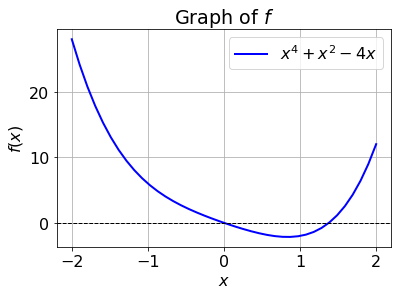

In [61]:
X = np.linspace(-2, 2, 40)
Y = [(lambda x: x**4 + x**2 - 4*x)(x) for x in X]
plot(X,Y,c='b',lw=2); grid()
axhline(0, lw=1, ls='dashed', c='black')
title('Graph of $f$')
xlabel('$x$'); ylabel('$f(x)$'); legend(['$x^4+x^2-4x$']);

Because we want to minimize $Z$, we have to find the global minimum of the graph of $f$. We can see that the minimum lies on the interval $[a,b]$. However, with the bisection method we will only find the root of a function, which in this case, leads us to two points that intersect with the x-axis.

We know that if we differentiate $f$, we can find a local minima where $\dfrac{df}{dx} = 0$, which is a root of $f'$! To illustrate the idea, let's create a graph of $f'(x)$:

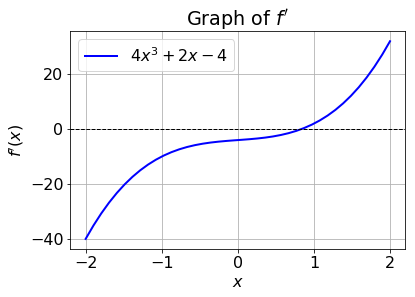

In [70]:
X = np.linspace(-2, 2, 40)
Y = [(lambda x: 4*x**3 + 2*x - 4)(x) for x in X]
plot(X,Y,c='b',lw=2); grid()
axhline(0, lw=1, ls='dashed', c='black')
title('Graph of $f\'$')
xlabel('$x$'); ylabel('$f\'(x)$'); legend(['$4x^3 + 2x - 4$']);

If we find $\dfrac{df}{dx}$, the global minimum will be at $\dfrac{df}{dx}=0$. This means that we can use the bisection algorithm to find the root of $f'$, which will be the global minimum of $f$.

### Bisection algorithm

Let $f$ denote a function with a root on the interval $[a,b]$. We will denote the left endpoint with $\underline{x}$, and the right endpoint with $\overline{x}$. The center point is $x'$. Finally, the error margin is $\epsilon$.

**Algorithm (bisection method / minimize):**

1. Determine $f'(x)$.
2. Select $\underline{x}=a$, $\overline{x}=b$, and $\epsilon$.
3. Determine $x'= (\underline{x} + \overline{x})\ /\ 2 $
4. Iterate:
  1. Determine $f'$ for $x=x'$.
  2. If $f(x) \geq 0$ then set $\underline{x} := x'$.
  3. If $f(x) \leq 0$ then set $\overline{x} := x'$.
  4. Set $x'= (\underline{x} + \overline{x})\ /\ 2 $
5. Goto 4 until $f'(x') \leq \epsilon$.

,df_dx,left endpoint,right_endpoint,new_x
0,-2.500000,0.000000,1.000000,0.500000
1,-0.812500,0.500000,1.000000,0.750000
2,0.429688,0.750000,1.000000,0.875000
3,-0.229492,0.750000,0.875000,0.812500
4,0.090210,0.812500,0.875000,0.843750
5,-0.072067,0.812500,0.843750,0.828125
6,0.008459,0.828125,0.843750,0.835938
7,-0.031956,0.828125,0.835938,0.832031
8,-0.011787,0.832031,0.835938,0.833984
9,-0.001673,0.833984,0.835938,0.834961


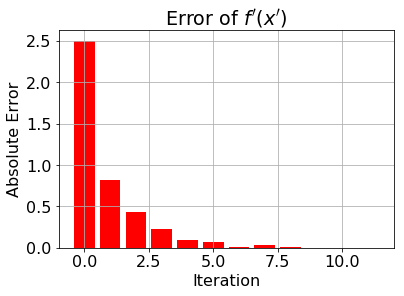

In [71]:
def opt_bisection1d_min(f, a, b, eps):
    
    # determine starting variables
    result = []
    x = (a+b)/2
    
    # check that there is a root on the interval [a,b]
    if f(a) * f(b) >= 0: 
        raise ValueError('function has no root on interval [a, b]!')
        
    # bisection algorithm
    while abs(f(x)) > eps:
        if f(x) >= 0: b = x
        else: a = x
        x = (a+b) / 2
        result.append((f(x), a, b, x))
        
    # results as a dataframe
    DFDX, A, B, X = zip(*result)
    df = pd.DataFrame()
    df['df_dx'] = DFDX
    df['left endpoint'] = A
    df['right_endpoint'] = B
    df['new_x'] = X
    
    # error plot
    bar(df.index, abs(df['df_dx']), fc='r')
    axhline(0, c='black', ls='dashed', lw=1)
    grid(); title('Error of $f\'(x\')$')
    xlabel('Iteration'); ylabel('Absolute Error')
    
    return df

# testing the algorithm for:   min Z = x^4 + x^2 - 4x
opt_bisection1d_min(lambda x: 4*x**3 + 2*x - 4, 0, 2, 0.001)

## Netwon's method

Oh yeah baby Newton...

# References

1. Introduction to Operations Research, Hillier/Lieberman, chapter 13.